In [1]:
import numpy as np
import cv2.cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

### Lecture de l'image

In [31]:
img = cv.imread("../Images/Valset/V300060.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

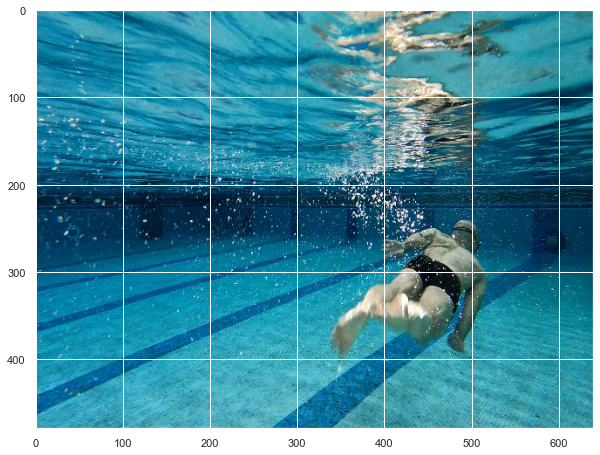

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [5]:
from Code.Preprocessing.CreateDataframe import createDataframe

In [6]:
df = pd.DataFrame()

filename = "../Images/Valset/V1"
nbtraining=10

for nb in range(nbtraining):
    img = cv.imread(f"{filename}{str(nb).zfill(5)}.jpg")
    df_one = createDataframe(img)
    df = pd.concat([df, df_one], axis=0)

In [33]:
img2 = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img2 = img2.reshape(-1, 3)

df = pd.DataFrame()
df['ColourCode(H)'] = img2[:, 0]
df['ColourCode(S)'] = img2[:, 1]
df['ColourCode(V)'] = img2[:, 2]

In [7]:
from sklearn.mixture import GaussianMixture

In [29]:
gmm = GaussianMixture(n_components=2).fit(df)

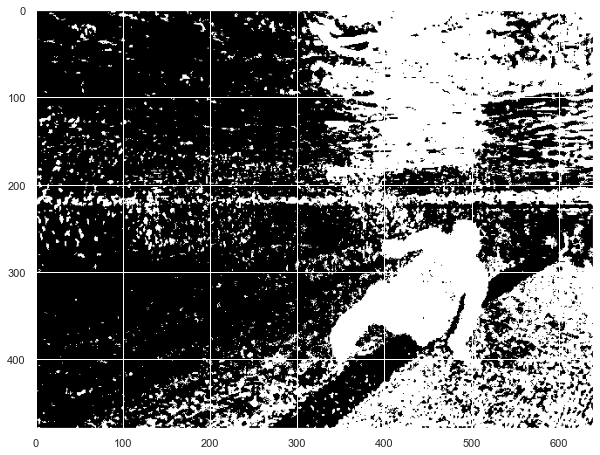

In [34]:


labels = gmm.predict(df)
labels = labels.reshape((480,640))
plt.figure(figsize=(10,10))
plt.imshow(labels, cmap="gray")
plt.show()

### Traitement image en noir et blanc

### Traitement HSV

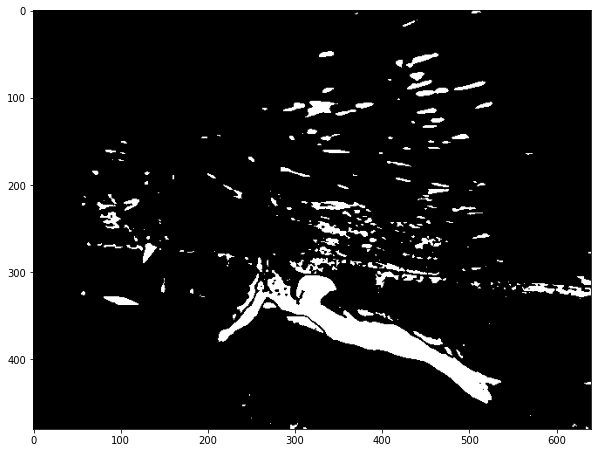

In [168]:
saliency = cv.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(img)

saliencyMap = (saliencyMap * 255).astype("uint8")


suc, threshMap = cv.threshold(saliencyMap , 100, 255, cv.THRESH_BINARY)

threshMap = cv.erode(threshMap, None, iterations=0)

plt.figure(figsize=(10,10))
plt.imshow(threshMap, cmap="gray")
plt.show()

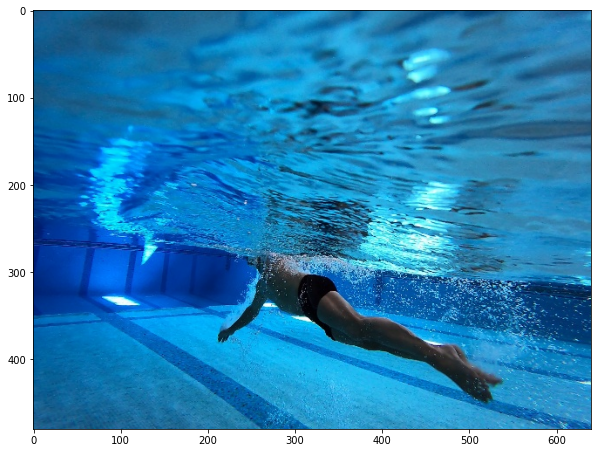

In [195]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

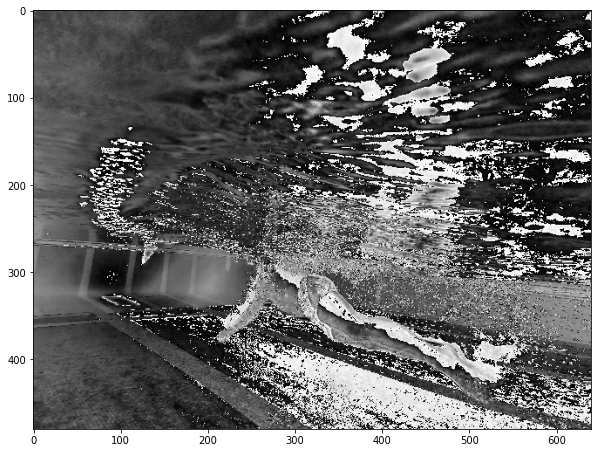

In [220]:
img2 = cv.cvtColor(img, cv.COLOR_RGB2HSV)

#img2 = cv.medianBlur(img2, 5)

H, S, V = cv.split(img2)

M = ( S - V ) 

plt.figure(figsize=(10,10))
plt.imshow(M, cmap="gray")
plt.show()

In [221]:
L, T = R_pca(M).fit()

iteration: 1, error: 12.404161597261949
iteration: 3, error: 0.004664808186297467


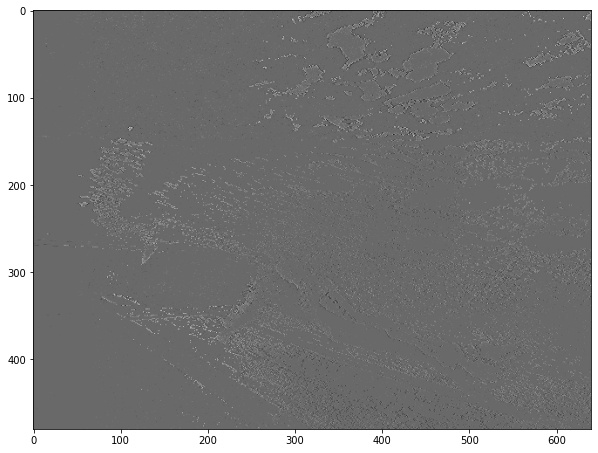

In [222]:
plt.figure(figsize=(10,10))
plt.imshow(T, cmap="gray")
plt.show()

In [202]:
from __future__ import division, print_function

import numpy as np

try:
    from pylab import plt
except ImportError:
    print('Unable to import pylab. R_pca.plot_fit() will not work.')

try:
    # Python 2: 'xrange' is the iterative version
    range = xrange
except NameError:
    # Python 3: 'range' is iterative - no need for 'xrange'
    pass


class R_pca:

    def __init__(self, D, mu=None, lmbda=None):
        self.D = D
        self.S = np.zeros(self.D.shape)
        self.Y = np.zeros(self.D.shape)

        if mu:
            self.mu = mu
        else:
            self.mu = np.prod(self.D.shape) / (4 * np.linalg.norm(self.D, ord=1))

        self.mu_inv = 1 / self.mu

        if lmbda:
            self.lmbda = lmbda
        else:
            self.lmbda = 1 / np.sqrt(np.max(self.D.shape))

    @staticmethod
    def frobenius_norm(M):
        return np.linalg.norm(M, ord='fro')

    @staticmethod
    def shrink(M, tau):
        return np.sign(M) * np.maximum((np.abs(M) - tau), np.zeros(M.shape))

    def svd_threshold(self, M, tau):
        U, S, V = np.linalg.svd(M, full_matrices=False)
        return np.dot(U, np.dot(np.diag(self.shrink(S, tau)), V))

    def fit(self, tol=None, max_iter=1000, iter_print=100):
        iter = 0
        err = np.Inf
        Sk = self.S
        Yk = self.Y
        Lk = np.zeros(self.D.shape)

        if tol:
            _tol = tol
        else:
            _tol = 1E-7 * self.frobenius_norm(self.D)

        #this loop implements the principal component pursuit (PCP) algorithm
        #located in the table on page 29 of https://arxiv.org/pdf/0912.3599.pdf
        while (err > _tol) and iter < max_iter:
            Lk = self.svd_threshold(
                self.D - Sk + self.mu_inv * Yk, self.mu_inv)                            #this line implements step 3
            Sk = self.shrink(
                self.D - Lk + (self.mu_inv * Yk), self.mu_inv * self.lmbda)             #this line implements step 4
            Yk = Yk + self.mu * (self.D - Lk - Sk)                                      #this line implements step 5
            err = self.frobenius_norm(self.D - Lk - Sk)
            iter += 1
            if (iter % iter_print) == 0 or iter == 1 or iter > max_iter or err <= _tol:
                print('iteration: {0}, error: {1}'.format(iter, err))

        self.L = Lk
        self.S = Sk
        return Lk, Sk

    def plot_fit(self, size=None, tol=0.1, axis_on=True):

        n, d = self.D.shape

        if size:
            nrows, ncols = size
        else:
            sq = np.ceil(np.sqrt(n))
            nrows = int(sq)
            ncols = int(sq)

        ymin = np.nanmin(self.D)
        ymax = np.nanmax(self.D)
        print('ymin: {0}, ymax: {1}'.format(ymin, ymax))

        numplots = np.min([n, nrows * ncols])
        plt.figure()

        for n in range(numplots):
            plt.subplot(nrows, ncols, n + 1)
            plt.ylim((ymin - tol, ymax + tol))
            plt.plot(self.L[n, :] + self.S[n, :], 'r')
            plt.plot(self.L[n, :], 'b')
            if not axis_on:
                plt.axis('off')

In [223]:
color = img

intensity = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

c_int = intensity.std()

img2 = cv.cvtColor(img, cv.COLOR_RGB2HSV)

H, S, transmission = cv.split(img2)

In [225]:
c_int

33.8539509112965